# 분류(Classification)의 개요

## 결정 트리 실습 1) 와인 데이터 - Kaggle 와인 데이터를 일부 활용하여 사용

In [8]:
# 데이터 수집
import pandas as pd
import numpy as np
wine_kaggle = pd.read_csv('C:/Users/gihun/Python_Data/data/wine_dataset.csv')
wine_kaggle

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
wine_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
wine_kaggle['style'].value_counts(normalize=True) # normalize=True 비율로 나옴!

white    0.753886
red      0.246114
Name: style, dtype: float64

In [20]:
# wine_kaggle의 alcohol, residual_sugar, ph, style 데이터만 사용하고 싶음!
wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH', 'style']]
wine

,alcohol,residual_sugar,pH,style
0,9.4,1.9,3.51,red
1,9.8,2.6,3.20,red
2,9.8,2.3,3.26,red
3,9.8,1.9,3.16,red
4,9.4,1.9,3.51,red
...,...,...,...,...
6492,11.2,1.6,3.27,white
6493,9.6,8.0,3.15,white
6494,9.4,1.2,2.99,white
6495,12.8,1.1,3.34,white


In [21]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alcohol         6497 non-null   float64
 1   residual_sugar  6497 non-null   float64
 2   pH              6497 non-null   float64
 3   style           6497 non-null   object 
dtypes: float64(3), object(1)
memory usage: 203.2+ KB


In [22]:
wine.describe()

,alcohol,residual_sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [34]:
# 데이터 준비, 분할
X=wine.drop(columns='style').values # 혹은 drop('style', axis=1)
y=wine['style'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
pd.Series(y_train).value_counts(normalize=True),pd.Series(y_test).value_counts(normalize=True)

(white    0.753896
 red      0.246104
 dtype: float64,
 white    0.753846
 red      0.246154
 dtype: float64)

와인데이터 from Keggle
0이면 레드와인, 1이면 화이트 -> 전체 와인 중 화이트와인을 골라낸다

In [38]:
# 과적합 모델: train_score 가 높은데, test_score가 낮은 경우!

In [ ]:
# 시각화 : plot_tree()

In [ ]:
# Plot_tree()  트리 깊이 제한, 색깔 부여, 특성 이름 전달


* 가지치기 - 과적합 방지, (깊이 제한 ) 

In [ ]:
# 가지치기한 dt를 시각화



* 결정 트리에서 특성 스케일링 필요성

In [ ]:
# 표준화 스케일링 하지 않은 DT 시각화 -> 이해하기 쉽다


#### 특성 중요도(Feature Importance)
- 어떤 특성이 가장 유용한 특성인지 나타냄
- feature_importances_  속성에 저장되어 있음

- 특성 중요도 계산 원리: 각 노드의 정보 이득 * 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산함
- 특성 중요도의 활용: 특성 선택에 활용(즉, 결정 트리 모델을 특성 선택에 활용)

## 결정 트리 실습 2) 붓꽃 데이터 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [3]:
# 성능 평가
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
0.9666666666666667


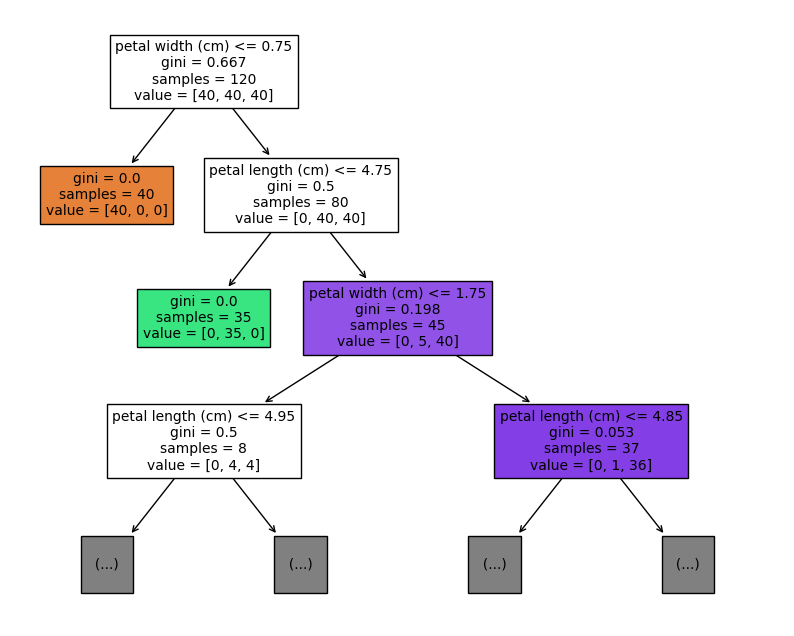

In [4]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(dt,max_depth=3, filled=True, feature_names=iris.feature_names)
plt.show() # 더 이상 분할을 할 수 없는 것들 = leaf, rootp = 제일 머리,  # 결정트리 단점: 트리가 복잡해지면 해석도 어렵고, 이상치에 엄청나게 민감한 성격이 있음

## 참고: 엔트로피를 사용하여 결정트리 만들기

### 결정 트리 모델의 시각화(Decision Tree Visualization)

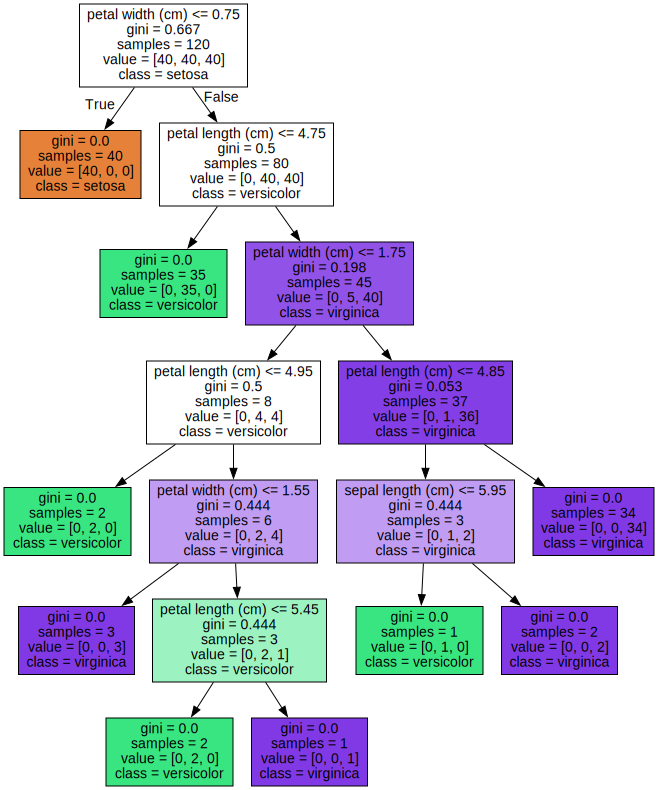

In [5]:
#Graphviz 패키지 사용
import graphviz
from sklearn.tree import export_graphviz
label_names=iris.target_names
#best_dt =grid.best_estimator
dot_data = export_graphviz(dt, out_file=None, class_names=label_names,\
                           feature_names = iris.feature_names,\
                           impurity=True, filled=True)

# Draw graph with png format , default pdf
graph = graphviz.Source(dot_data, format="png") 
graph

# 파일로 만드는 경우, 
#graph.render('tree')

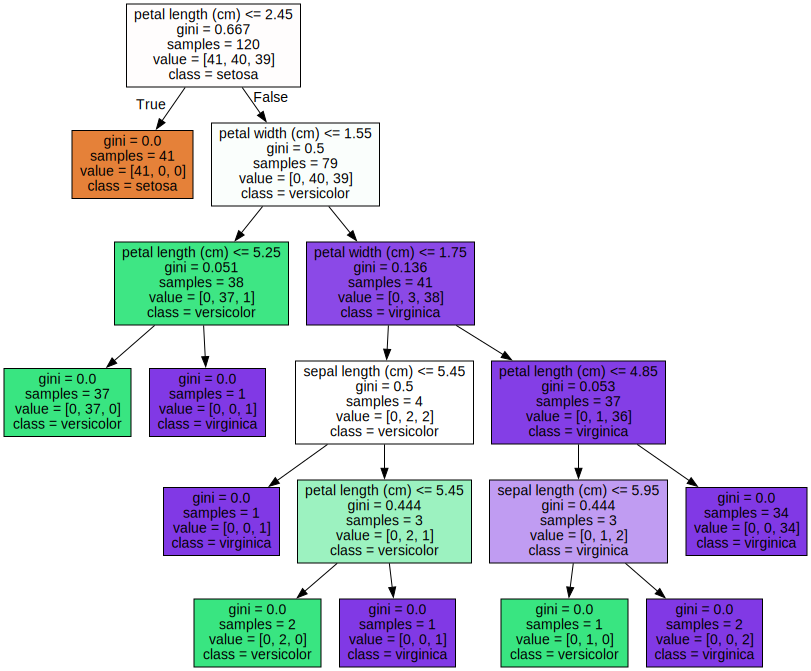

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 결정 트리의 중요한 역할 피처: feature_importances_

In [7]:
dt.feature_importances_

array([0.01666667, 0.        , 0.42987988, 0.55345345])

### 결정 트리(Decision TREE) 과적합(Overfitting)
- 결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리노드를 계속해서 만들어 가므로 매우 복잡한 트리가 만들어져 쉽게 과적합된다.

- 결정트리 하이퍼파라미터 : 복잡한 트리 생성 방지 목적이 크다.

* max_depth: 결정 트리 최대 깊이 제한
* min_samples_split: 자식 노드를 분할하기 위한 최소한의 샘플데이터 수
* min_samples_leaf: 리프 노드가 될 수 있는 샘플 데이터 건수의 최소값

# 교차검증과 그리드 서치

----------------------------------------------------------------------

# [실습] 타이타닉 데이터 결정트리 분류

* 타이타닉 데이터를 결정트리 알고리듬에 따라 분류하고, 로지스틱 회귀와 평가지표를 비교하라

# [심화] 결정 트리 실습 - Human Activity Recognition